# Forward Simulation Analysis (FSA)

After data smoothing and initial diffusion coefficients modeling, we can perform forward simulation analysis to calculate accurate diffusion coefficients from diffusion profiles.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from pydiffusion.io import read_csv
from pydiffusion.plot import profileplot, DCplot, SFplot
from pydiffusion.fsa import FSA

## Read data from previous data smoothing & DC modeling

Here we read previous results of Ni-Mo 1100C 1000 hours datasets, and plot them out.

(The Xspl info required to input manually if initial DC modeling is read from file)

Left figure: smoothed profile vs. experimental profile
Right figure: initial DC modeling vs. Sauer-Fraise calculation

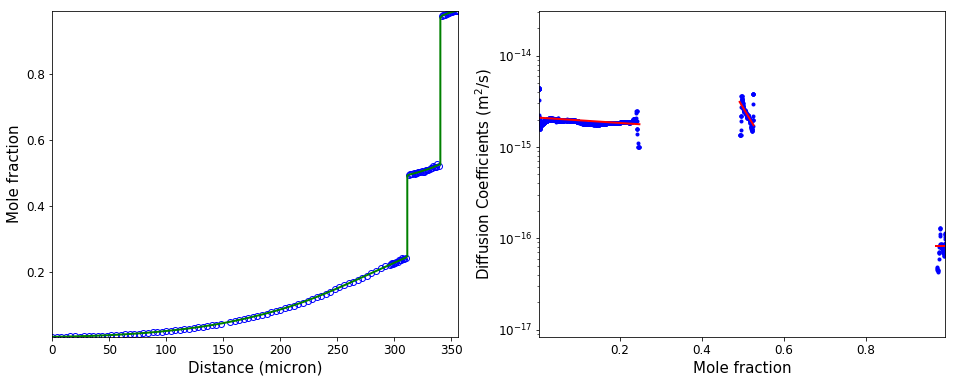

In [2]:
NiMo_sm, diffsys_init = read_csv('NiMo_DC_init.csv')
NiMo_exp, _ = read_csv('NiMo_exp.csv')
Xp = [np.array([.05, .2]), np.array([.5, .515]), np.array([.985])]
diffsys_init.Xspl = Xp
time = 3600*1000

fig = plt.figure(figsize=(16, 6))
ax1, ax2 = fig.add_subplot(121), fig.add_subplot(122)
profileplot(NiMo_exp, ax1, ls='none', marker='o', fillstyle='none')
profileplot(NiMo_sm, ax1, c='g', lw=2)
SFplot(NiMo_sm, time, ax=ax2, Xlim=[0, 1])
DCplot(diffsys_init, ax2, c='r', lw=2)

## Forward simulation analysis (FSA)

Forward simulation analysis (FSA) is performed in the following steps:

1. Use DC modeling to simulate the diffusion process.
2. Compare the simulated profile vs. experimental profile, see if the difference between 2 profiles is smaller enough.
3. If not, compare the simulated profile vs. smoothed profile, adjust the DC modeling using **Per-Point** or **Whole-Phase** method.
4. Use the new DC modeling to simulate the diffusion process again...

**Per-Point Mode**: Can be applied only when reference points in Spline functions are provided, i.e. DiffSystem.Xspl is not None. Each diffusion coefficient value at reference point is adjusted at first, then Spline function is generated depending on adjusted diffusion coefficients. In the logD vs. X figure, the shape of DC curve might change.

**Whole-Phase Mode**: Can be applied on both Spline and UnivariateSpline modeling. The diffusion coefficients inside each phase are adjusted by the phase width comparison or manually input. In the logD vs. X figure, the shape of DC curve doesn't change.

In the FSA function, default error is defined by the difference between smoothed profile and experimental profile. The error of each simulation round is defined by the difference between simulated profile and experimental profile.

The stop criteria of error is the cap for manually adjustment. If the error is larger than this value, the function will adjust the system by per-point or whole-phase mode automatically; if the error is smaller than this criteria, the function will ask to choose between further manually adjustment or exit. Of course, automatically adjustment can also be used when the criteria is reached.

In this example, automatic whole-phase mode will be used.

Meshing Num=326, Minimum grid=0.450483 um
Default error = 0.000990
Input the stop criteria of error: [0.001980]
.002
Use whole-phase mode? [n]
(The shape of diffusivity curve does not change)
y


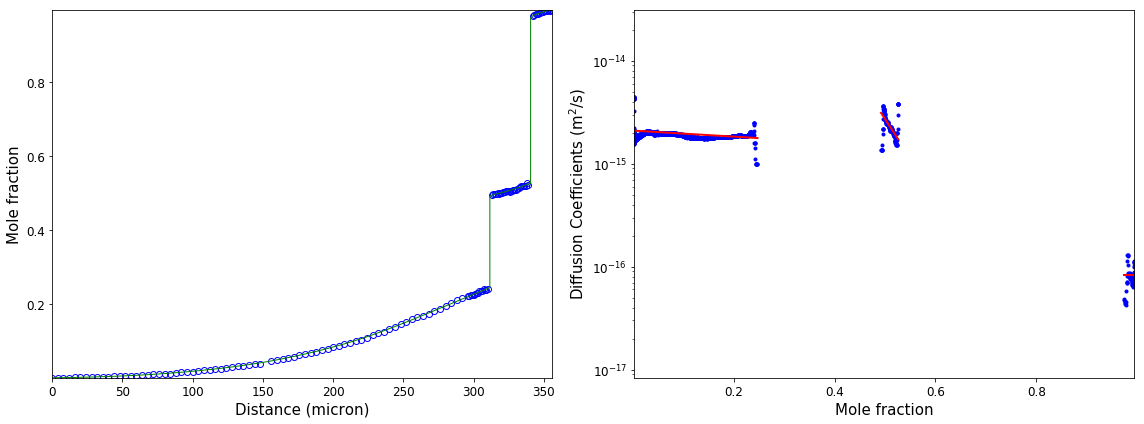

Simulation Complete
Simulation 1, error = 0.002082(0.002000)


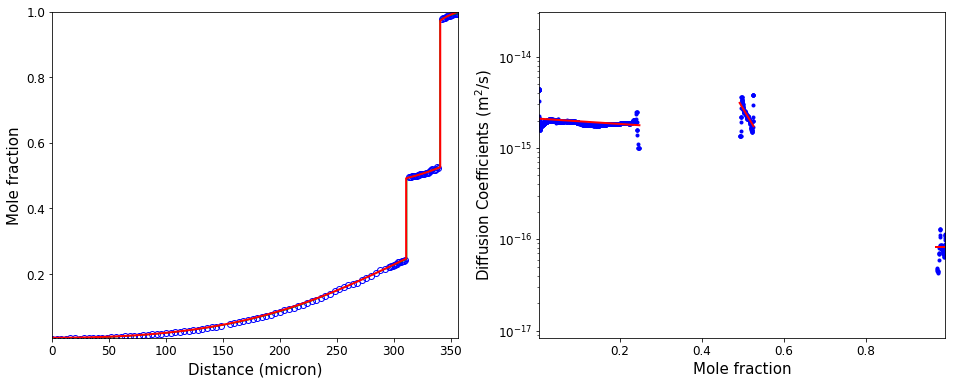

Simulation Complete
Simulation 2, error = 0.001963(0.002000)


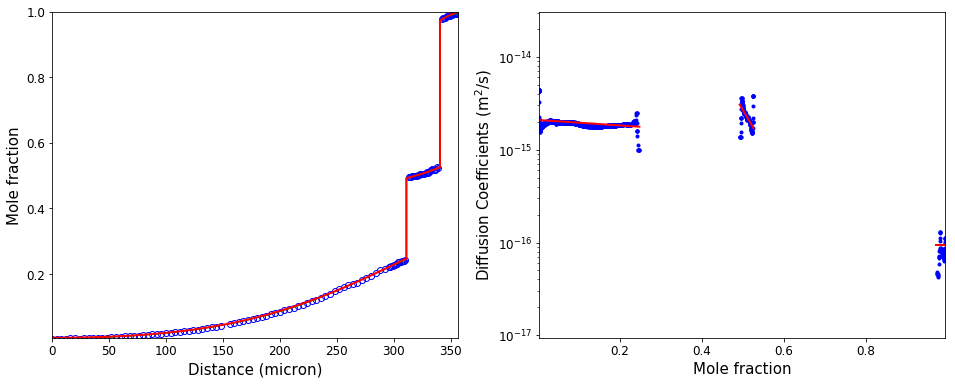

Satisfied with FSA? [n]n
Use per-point mode? [y]n
Whole-phase mode
Manually input for each phase? [n]n


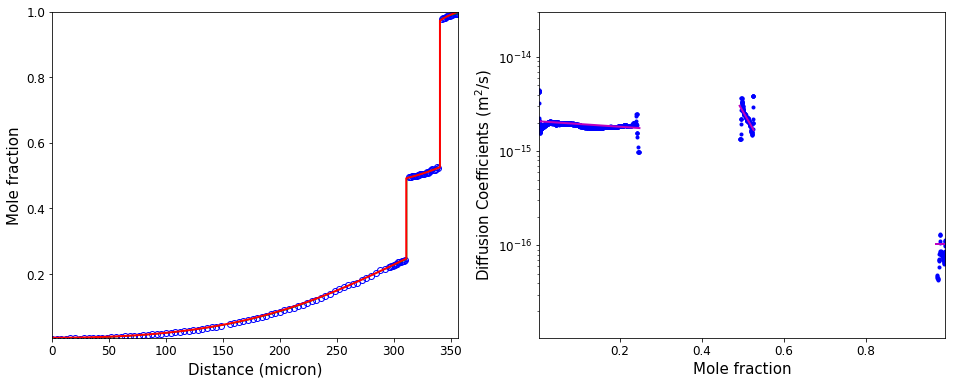

Simulation Complete
Simulation 3, error = 0.001881(0.002000)


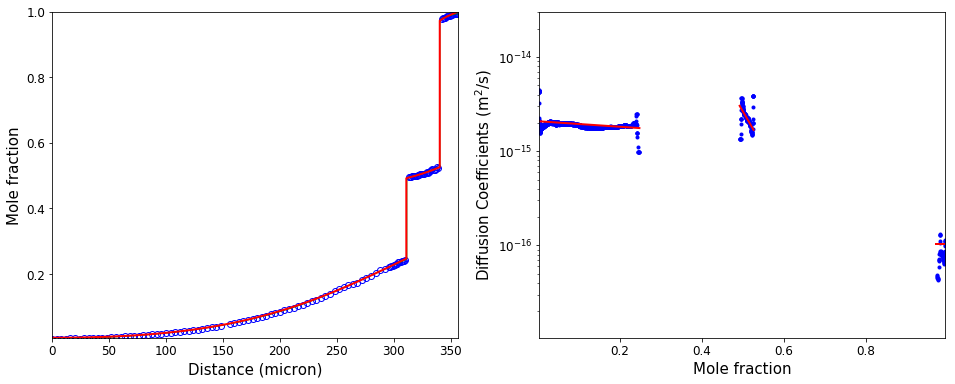

Satisfied with FSA? [n]y


In [3]:
NiMo_sim, diffsys_fsa = FSA(NiMo_exp, NiMo_sm, diffsys_init, time, Xlim=[0, 1], n=[300, 350], gui=False)

## Plot the results

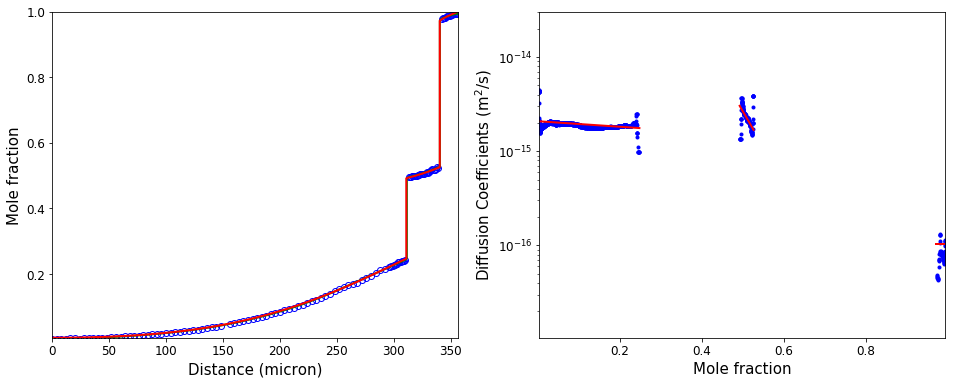

In [4]:
fig = plt.figure(figsize=(16, 6))
ax1, ax2 = fig.add_subplot(121), fig.add_subplot(122)
profileplot(NiMo_exp, ax1, ls='none', marker='o', fillstyle='none')
profileplot(NiMo_sm, ax1, c='g', lw=2)
profileplot(NiMo_sim, ax1, c='r', lw=2)
SFplot(NiMo_sm, time, ax=ax2, Xlim=[0, 1])
DCplot(diffsys_fsa, ax2, c='r', lw=2)